<a href="https://colab.research.google.com/github/ali-adel/Statistics_EDA/blob/main/18_Degree_of_freedom(dof).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
from scipy.stats import norm,t
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt


# **Degree of freedom(dof)**

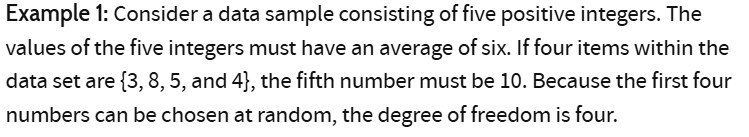

#**variance**

# with population

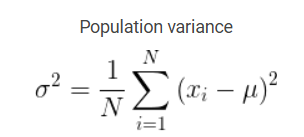

**here no problem with devidin on N as we in the population**

# with sample

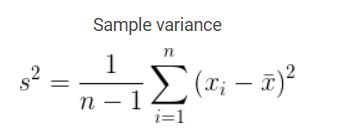

# Here we find out that when the sample size n < 1000 the s become not correct and less than the corrcet var of the population so when the n < 1000 we make the n become n-1 or degree of freedom (dof) is n-1 and delta degree of freedom (ddof) is 1 and all of this called **Passel's correction**

In [2]:
D = np.random.exponential(size=10) # lambda = 1 and var = 1/lambda = 1 (population var)
D.var() # with n = 10 var = 1.59 (so far Ha)

1.595377460768344

In [3]:
D = np.random.exponential(size=100) # lambda = 1 and var = 1/lambda = 1
D.var() # with n = 100 var = 0.7 (closer)

0.7800178574468708

In [4]:
D = np.random.exponential(size=1000) # lambda = 1 and var = 1/lambda = 1
D.var() # with n = 10 var = 0.9 (approximately equal)

0.970975596963196

# **what about the std in the CI**

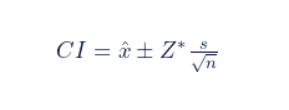

## the same problem here the S or std can be under estimated with n < 1000 so with n < 1000 we use t-distribution instead z-ditribution as it correct the s value as when n decrease the t-value increase To make up for the difference but when the n reach 1000 or above the t-value and z-value become the same as the problem vanish there

# **Theoritical**

# z and t value for 95% CI

In [8]:
norm.ppf((0.95/2)+0.5)

1.959963984540054

**for degree of freedom (df) = 100**

In [12]:
t.ppf((0.95/2)+0.5,df=100)

1.9839715184496334

for degree of freedom (df) = 1000

In [13]:
t.ppf((0.95/2)+0.5,df=1000) # approximatelly the same of z-value with df >= 1000

1.9623390808264074

# **Practical**

<Axes: ylabel='Count'>

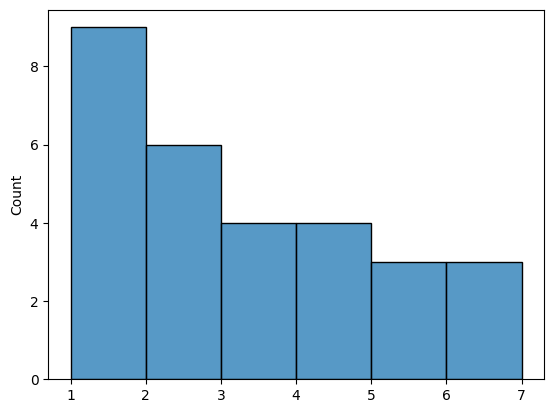

In [15]:
D = np.array([1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,6,6,7])
sns.histplot(D)

# Calculate CI with CL = 95%

In [20]:
x_= D.mean()
s = D.std()
se = s/np.sqrt(len(D))
z_value = norm.ppf((0.95/2)+0.5)
t_value = t.ppf((0.95/2)+0.5,df=len(D)-1)

In [21]:
print("z_value : ", z_value)
print("t_value : ", t_value)
# t_value is grater than z_value as the df is small = 28 which < 1000

z_value :  1.959963984540054
t_value :  2.048407141795244


In [24]:
ci_low_z,ci_high_z = x_ - z_value * se ,x_ + z_value * se
ci_low_t,ci_high_t = x_ - t_value * se ,x_ + t_value * se

In [28]:
print("CI from z is :","[",ci_low_z," , ",ci_high_z,"]")
print("CI from t is :","[",ci_low_t," , ",ci_high_t,"]")
# we notice the different values between z and t because of the under estimate of s in z_value which appear in the df < 1000

CI from z is : [ 2.2157634621036433  ,  3.50837446893084 ]
CI from t is : [ 2.1865989979991065  ,  3.5375389330353766 ]


# CI using interval function

In [38]:
D = np.random.normal(10,2,size=20)
x_ = D.mean()
t.interval(confidence=0.95, # CL
           df=len(D),
           loc=x_, #estimate param,
           scale=st.sem(D), #se
           )

(8.186771549622382, 9.978681908011456)

<Axes: >

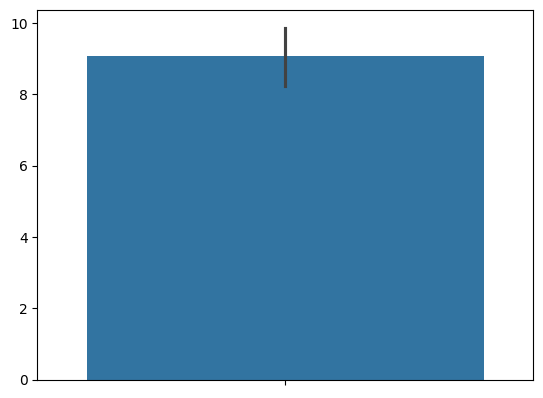

In [40]:
sns.barplot(y=D)

# **NOTE** : the black line here is the CI